In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [79]:
with open("backprop_scores.pickle", "rb") as f:
    attribution_results = pickle.load(f)
    
with open("smooth_scores.pickle", "rb") as f:
    smooth_results = pickle.load(f)

IOError: [Errno 2] No such file or directory: 'smooth_scores.pickle'

In [80]:
np.mean(attribution_results[model_name][0])

0.76338096432919078

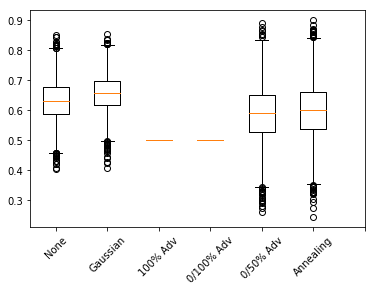

In [82]:
model_name = 'DistNet'
# plot box plot
fig = plt.figure()
plt.boxplot([attribution_results[model_name][0], attribution_results[model_name + '_noise'][0], 
             attribution_results[model_name + '_adv0'][0], 
             attribution_results[model_name + '_adv1'][0], 
             attribution_results[model_name + '_adv2'][0], attribution_results[model_name + '_adv3'][0]])
plt.xticks([1,2,3,4,5,6,7], ['None',  'Gaussian', '100% Adv', '0/100% Adv', '0/50% Adv', 'Annealing'], rotation=45)
# plt.title('Shallow Network')
plt.savefig('images/' + model_name + '_' + 'backprop' + '.eps', bbox_inches = 'tight')
plt.savefig('images/' + model_name + '_' + 'backprop' + '.png', bbox_inches = 'tight')
plt.savefig('images/' + model_name + '_' + 'backprop' + '.pdf', bbox_inches = 'tight')
plt.show()

In [72]:
model_name = 'cnn_deep_noreg'
# plot box plot
fig = plt.figure()
plt.boxplot([attribution_results[model_name][0], attribution_results[model_name + '_noise'][0], 
     attribution_results[model_name + '_adv1'][0], 
             attribution_results[model_name + '_adv2'][0], attribution_results[model_name + '_adv2'][0]])
plt.xticks([1,2,3,4,5,6], ['None','Gaussian', '0/100% Adv', '50% Adv', 'Annealing'], rotation=45)
plt.title('Deep Network')
plt.savefig('images/' + model_name + '_' + 'backprop' + '.eps', bbox_inches = 'tight')
plt.savefig('images/' + model_name + '_' + 'backprop' + '.pdf', bbox_inches = 'tight')
plt.show()

KeyError: 'cnn_deep_noreg'

In [25]:
np.median(attribution_results[model_name + '_noise'][0])

0.8370533689115276

In [29]:
with open("mlp_acc2.pickle", "rb") as f:
    mnist_results = pickle.load(f)
    
with open("cnn_deep_noreg_acc2.pickle", "rb") as f:
    gene_results = pickle.load(f)

In [30]:
eps_list = np.linspace(0,1,51)


mnist = []
gene = []
for e in eps_list:
    mnist.append(np.mean(mnist_results[e]))
    gene.append(np.mean(gene_results[e]))

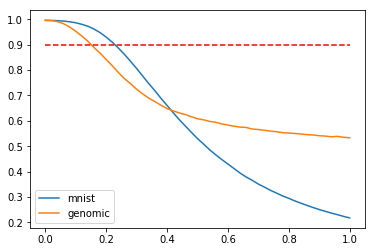

In [31]:
plt.plot(eps_list, mnist, label='mnist')
plt.plot(eps_list, gene, label='genomic')
plt.plot(eps_list, [0.9]*len(eps_list), 'r--')
plt.legend()
plt.savefig('images/adv_calibration2.pdf', bbox_inches = 'tight')
plt.show()

In [12]:

np.where(mnist < 0.9)

(array([], dtype=int64),)

In [28]:
eps_list[np.where(np.array(gene) < 0.9)[0][0]]

0.22

In [32]:
with open("cnn_deep_noreg_adv_accuracy.pickle", "rb") as f:
    clean_acc = pickle.load(f)
    
with open("cnn_deep_noreg_clean_accuracy.pickle", "rb") as f:
    adv_acc = pickle.load(f)

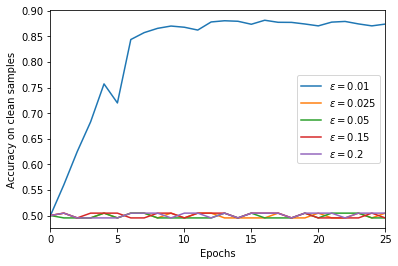

In [59]:
eps_list = [0.01, 0.025, 0.05, 0.01, 0.15, 0.2]

for idx, e in enumerate(eps_list):
    if e != 0.01 or idx == 0:
        plt.plot(list(range(0,26)), [0.5] + clean_acc[idx], label='$\epsilon=$' + str(e))
plt.xlabel('Epochs')
plt.xlim((0,25))
plt.ylabel('Accuracy on clean samples')
plt.legend()
plt.savefig('images/clean_acc.pdf', bbox_inches = 'tight')
plt.show()

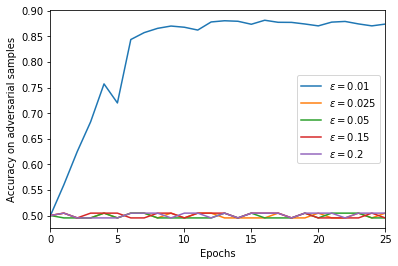

In [60]:
eps_list = [0.01, 0.025, 0.05, 0.01, 0.15, 0.2]

for idx, e in enumerate(eps_list):
    if e != 0.01 or idx == 0:
        plt.plot(list(range(0,26)), [0.5] + clean_acc[idx], label='$\epsilon=$' + str(e))
plt.xlabel('Epochs')
plt.xlim((0,25))
plt.ylabel('Accuracy on adversarial samples')
plt.legend()
plt.savefig('images/adv_acc.pdf', bbox_inches = 'tight')
plt.show()